Accuracy: 0.9427
Precision: 0.8000
Recall: 0.5149
F1 Score: 0.6265


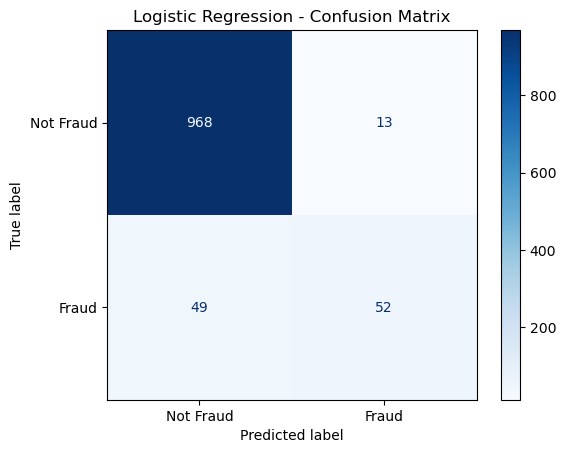

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv('final_provider_dataset.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (logistic regression performs better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


In [11]:
# Get feature importance (absolute value of coefficients) *be careful impacts coefficients
feature_importance = np.abs(log_reg.coef_[0])

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance - Logistic Regression')
plt.show()


NameError: name 'sns' is not defined

<Figure size 1200x600 with 0 Axes>

Accuracy: 0.8494
Precision: 0.3719
Recall: 0.8911
F1 Score: 0.5248


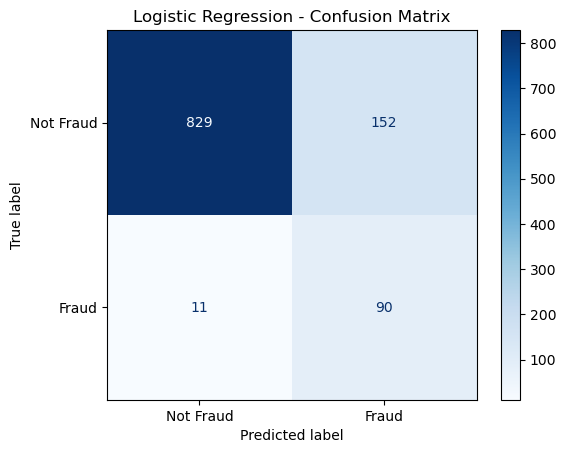

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv('final_provider_dataset.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (logistic regression performs better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression(class_weight='balanced',random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


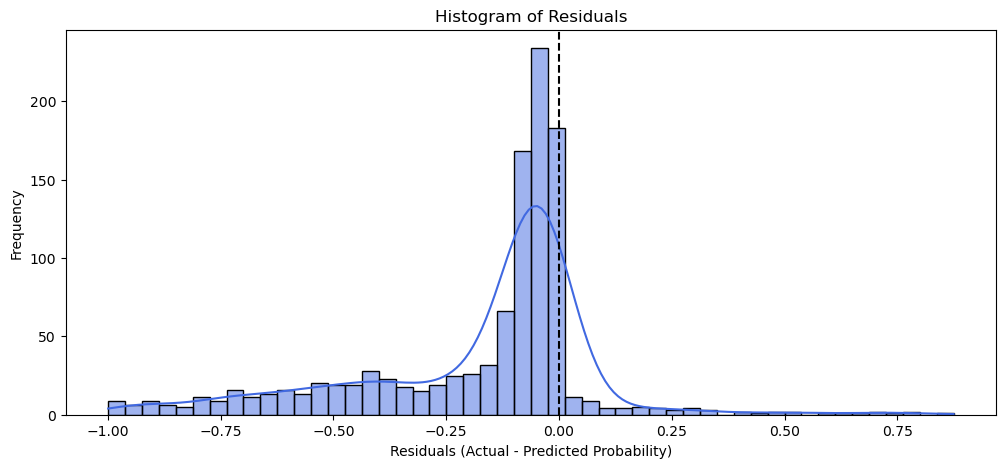

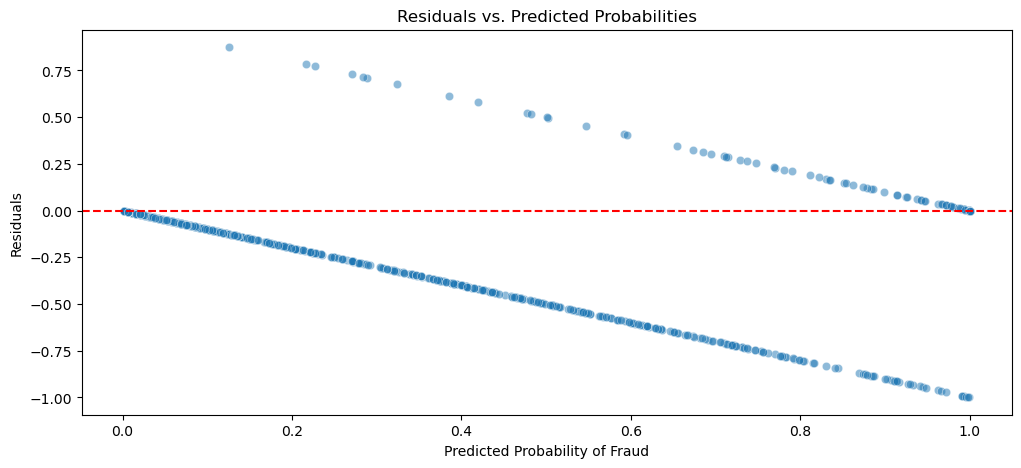

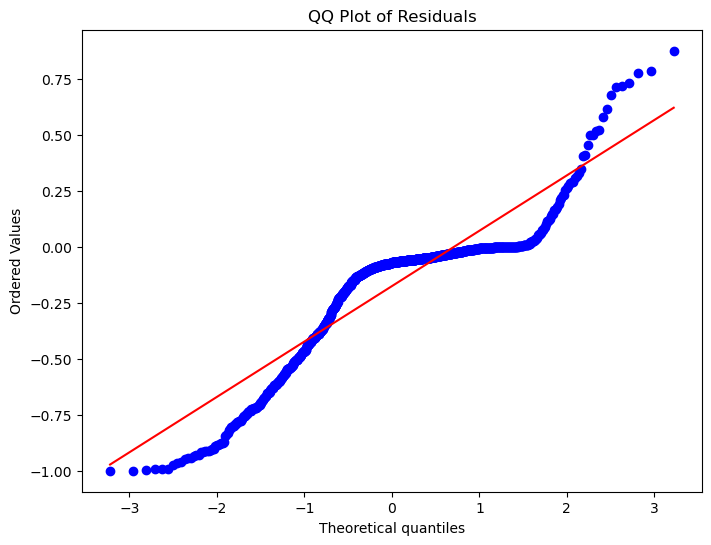

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Get predicted probabilities
y_probs = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for fraud (class 1)
residuals = y_test - y_probs  # Residuals (actual - predicted probability)

# Plot Histogram of Residuals
plt.figure(figsize=(12, 5))
sns.histplot(residuals, bins=50, kde=True, color='royalblue')
plt.axvline(0, color='black', linestyle='--')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals (Actual - Predicted Probability)')
plt.ylabel('Frequency')
plt.show()

# Residuals vs. Predicted Probabilities
plt.figure(figsize=(12, 5))
sns.scatterplot(x=y_probs, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Probabilities')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Residuals')
plt.show()

# QQ Plot for Normality Check
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()


Accuracy: 0.9409
Precision: 0.6907
Recall: 0.6634
F1 Score: 0.6768


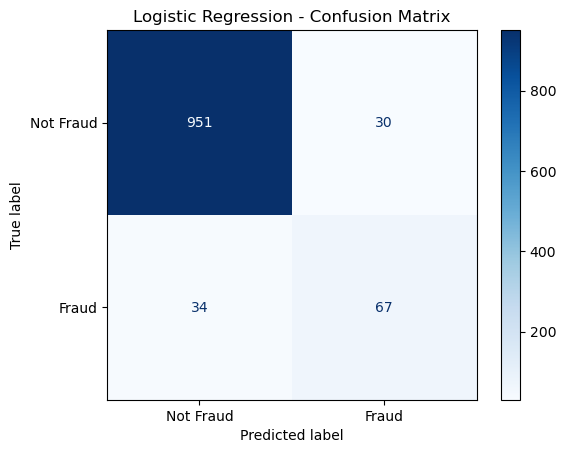

In [17]:
# Train logistic regression model with custom class weights
log_reg = LogisticRegression(random_state=42, class_weight={0: 1, 1: 2})
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


In [23]:
import numpy as np

# Get predicted probabilities
y_probs = best_log_reg.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Fraud)

# Adjust threshold
threshold = 0.6  # Increase to favor precision
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Evaluate new predictions
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

# Print updated metrics
print(f"Adjusted Threshold: {threshold}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


NameError: name 'best_log_reg' is not defined

Best Threshold: 0.69
Accuracy: 0.9140
Precision: 0.5256
Recall: 0.8119
F1 Score: 0.6381


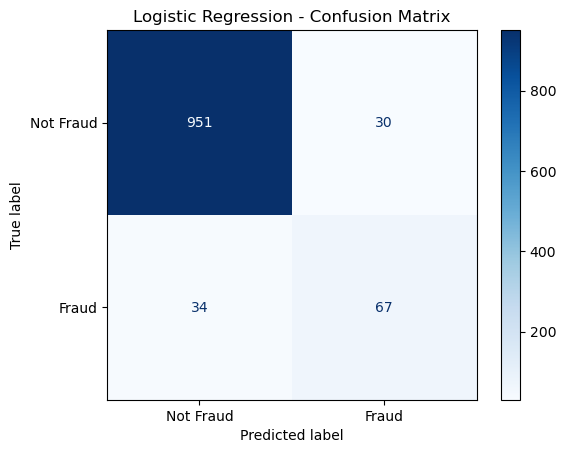

In [21]:
import numpy as np

best_f1 = 0
best_threshold = 0.5  # Default threshold
best_metrics = {}

# Iterate over thresholds from 0.5 to 0.7 in small steps
for threshold in np.arange(0.5, 0.7, 0.01):
    y_pred_adjusted = (y_probs >= threshold).astype(int)
    
    acc = accuracy_score(y_test, y_pred_adjusted)
    prec = precision_score(y_test, y_pred_adjusted)
    rec = recall_score(y_test, y_pred_adjusted)
    f1 = f1_score(y_test, y_pred_adjusted)
    
    # Track best F1-score threshold
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
        best_metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}

# Print best threshold and metrics
print(f"Best Threshold: {best_threshold:.2f}")
for metric, value in best_metrics.items():
    print(f"{metric}: {value:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

Accuracy: 0.8494
Precision: 0.3719
Recall: 0.8911
F1 Score: 0.5248


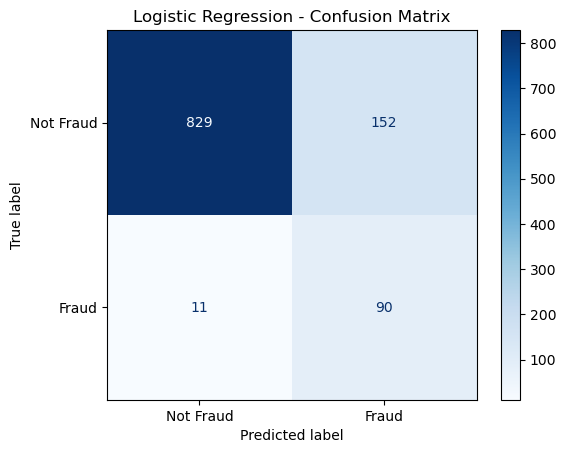

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Train logistic regression model with custom class weights
log_reg = LogisticRegression(random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


Gradient Boosting Classifier - Baseline Performance
Accuracy: 0.9427
Precision: 0.7600
Recall: 0.5644
F1 Score: 0.6477


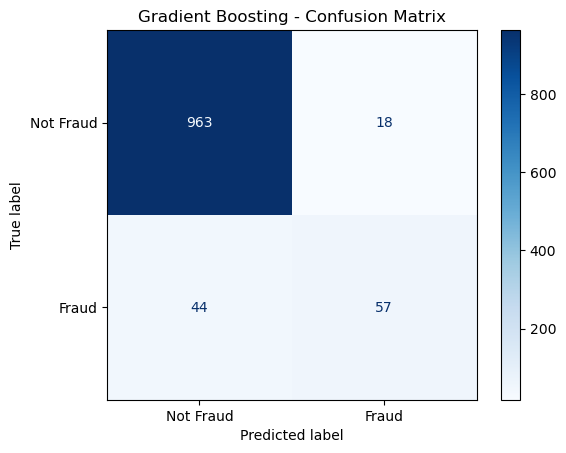

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv('final_provider_dataset.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (optional for tree-based models, but can help in some cases)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Make predictions
y_pred = gbc.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Gradient Boosting Classifier - Baseline Performance")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()


After Feature Selection:
Accuracy: 0.9418
Precision: 0.7500
Recall: 0.5644
F1 Score: 0.6441


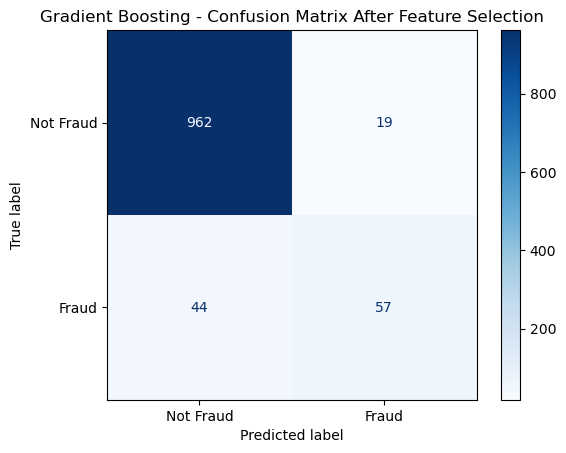

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_27208\2355145066.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='viridis')


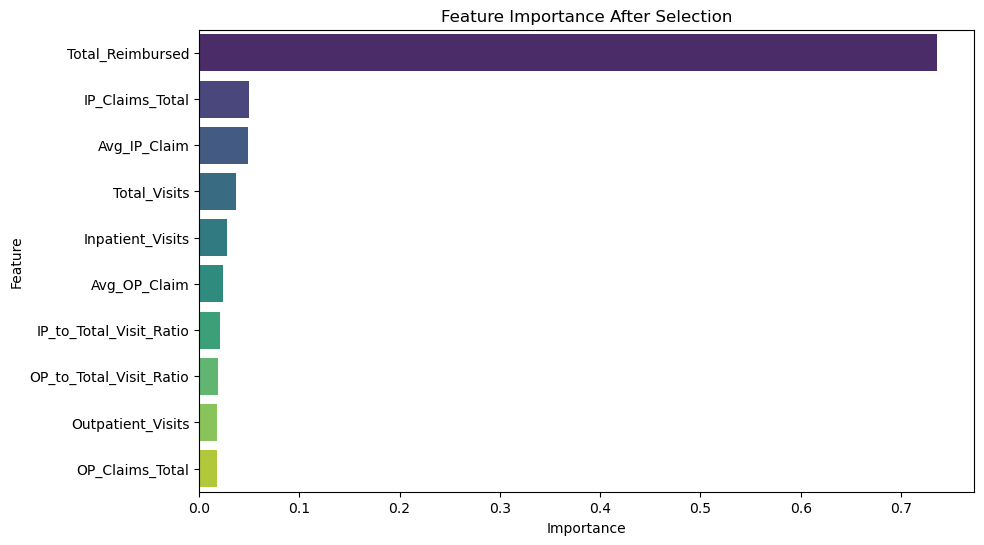

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_csv('final_provider_dataset.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features and target
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Remove least important features
least_important_features = ['Claim_Ratio', 'Claim_Ratio_IP_to_OP', 'Claim_Ratio_OP_to_Total']
X = X.drop(columns=least_important_features)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("After Feature Selection:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Gradient Boosting - Confusion Matrix After Feature Selection")
plt.show()

# Feature Importance Visualization
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': gb_clf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='viridis')
plt.title("Feature Importance After Selection")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Threshold: 0.5
Accuracy: 0.9427
Precision: 0.7468
Recall: 0.5842
F1 Score: 0.6556


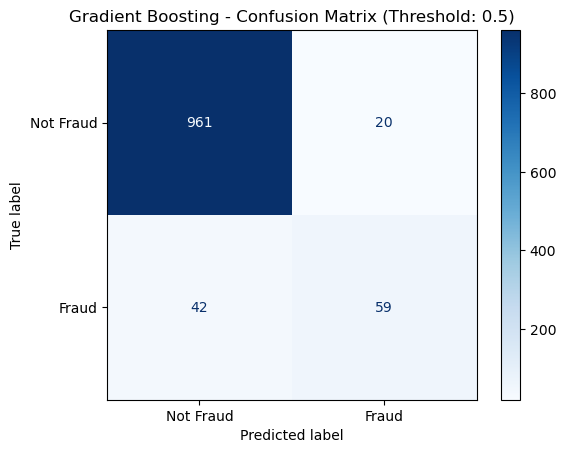

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('final_provider_dataset.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (for consistent scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an optimized Gradient Boosting model
gbc = GradientBoostingClassifier(
    n_estimators=200,  # More trees for better learning
    learning_rate=0.05,  # Lower LR for better generalization
    max_depth=4,  # Slightly deeper trees
    min_samples_split=5,  # Avoid small splits
    min_samples_leaf=2,  # Prevent overfitting
    subsample=0.8,  # Introduce randomness
    random_state=42
)
gbc.fit(X_train, y_train)

# Predict probabilities
y_proba = gbc.predict_proba(X_test)[:, 1]

# Apply new threshold (experiment with 0.65, 0.7, etc.)
threshold = 0.5
y_pred = (y_proba >= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Threshold: {threshold}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title(f"Gradient Boosting - Confusion Matrix (Threshold: {threshold})")
plt.show()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}
Accuracy: 0.9381
Precision: 0.6889
Recall: 0.6139
F1 Score: 0.6492


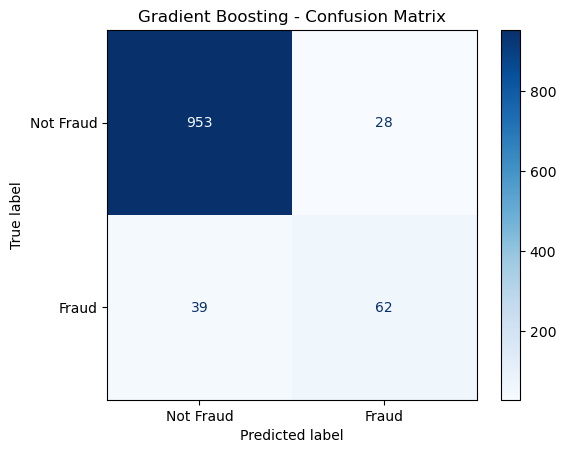

In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Load dataset
df = pd.read_csv('final_provider_dataset.csv')

# Convert PotentialFraud to binary
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Define features and target
X = df.drop(columns=['Provider', 'PotentialFraud'])
y = df['PotentialFraud']

# Split data (for final evaluation after cross-validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Shrinks contribution of each tree
    'max_depth': [3, 5, 7],  # Limits tree depth to prevent overfitting
    'subsample': [0.7, 0.9, 1.0],  # Fraction of samples used per tree
}

# Define model
gbm = GradientBoostingClassifier(random_state=42)

# Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run GridSearchCV
grid_search = GridSearchCV(gbm, param_grid, scoring='recall', cv=cv, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()


Threshold: 0.69
Accuracy: 0.9381
Precision: 0.6809
Recall: 0.6337
F1 Score: 0.6564


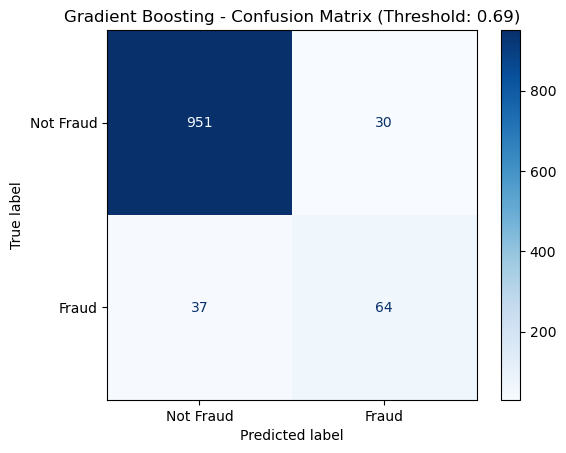

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('final_provider_dataset.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (important for some models, but not strictly required for tree-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Predict probabilities
y_proba = gbc.predict_proba(X_test)[:, 1]

# Apply new threshold (0.69)
y_pred = (y_proba >= 0.4).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Threshold: 0.69")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Gradient Boosting - Confusion Matrix (Threshold: 0.69)")
plt.show()
